In [1]:
import os
os.chdir("../..")

In [2]:
import astroclip
from astroclip.specformer.data import AstroClipDataset
from astroclip.specformer.preprocessing import spectrum_collate_fn
from astroclip.specformer.model import SpecFormer

from astroclip import format_with_env
import torch
import numpy as np

In [3]:
DATASET_PATH = format_with_env("{ASTROCLIP_ROOT}/datasets/astroclip_file/")
dataset = AstroClipDataset(
    path=DATASET_PATH,
    columns="spectrum",
    batch_size=32,
    num_workers=0,
    collate_fn=spectrum_collate_fn,
)

/mnt/home/lsarra/notebooks/AstroCLIP_v2/astroclip/env.py:29: UserWarning: No .env file found in /mnt/home/lsarra/notebooks/AstroCLIP_v2/astroclip. Using default environment variables for rusty. To suppress this warning, create /mnt/home/lsarra/notebooks/AstroCLIP_v2/astroclip/.env with, e.g., the following content:
ASTROCLIP_ROOT="/mnt/ceph/users/polymathic/astroclip"

  warn(


In [4]:
dataset.setup(None)
dataloader = dataset.train_dataloader()
sample = next(iter(dataloader))

Loading dataset from disk:   0%|          | 0/138 [00:00<?, ?it/s]

Loading dataset from disk:   0%|          | 0/35 [00:00<?, ?it/s]

In [5]:
model = SpecFormer(
    input_dim=196,
    embed_dim=192,
    num_layers=3,
    num_heads=3,
    max_len=80,
    dropout=0.1,
    norm_first=False,
)

In [6]:
model(sample["input"])

tensor([[[-1.6867e-01, -1.5489e-01, -1.3822e-01,  ..., -1.3822e-01,
          -1.3822e-01, -1.3822e-01],
         [-3.1187e-01, -3.1187e-01, -1.3778e+01,  ..., -1.0150e+00,
           7.2542e-01, -2.8927e+00],
         [ 1.3583e-01,  1.3583e-01,  1.5742e+00,  ..., -3.8873e+00,
          -1.5580e+00, -9.9143e-01],
         ...,
         [-5.2540e-01, -5.2540e-01, -5.2540e-01,  ..., -5.2540e-01,
          -5.2540e-01, -5.2540e-01],
         [ 4.3451e-01,  4.3451e-01,  7.0445e-01,  ...,  5.4720e-01,
           4.6722e-01,  7.6217e-01],
         [-2.4214e-01, -2.4214e-01,  5.6414e-02,  ...,  5.0943e-01,
           1.3824e-02, -3.2929e-01]],

        [[-5.9493e-01, -3.1724e-01, -1.6008e-01,  ..., -1.6008e-01,
          -1.6008e-01, -1.6008e-01],
         [ 2.5711e-01,  2.5711e-01, -1.4247e+00,  ...,  5.9050e-01,
          -1.6170e+00, -1.4869e+00],
         [-1.0988e-01, -1.0988e-01, -3.1343e+00,  ..., -1.9256e+00,
          -2.0161e+00, -1.8967e+00],
         ...,
         [-5.4780e-01, -5

In [7]:
model.training_step(sample)

tensor(0.0984)

In [10]:
import matplotlib.pyplot as plt

In [8]:
len(dataloader)

4949

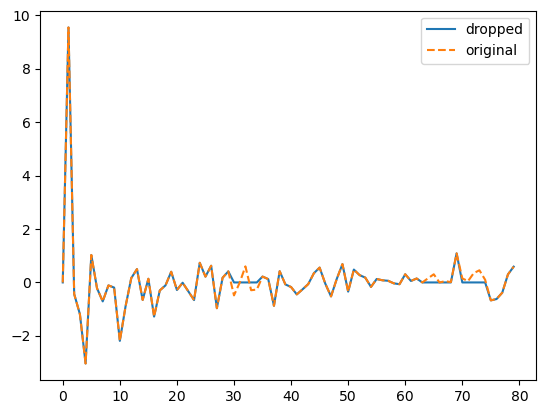

In [18]:
samp = 2

batch = next(iter(dataloader))
sp_ = batch['target'][samp,:,6]
in_ = batch['input'][samp,:,6]

plt.plot(in_, label='dropped')
plt.plot(sp_, label='original', linestyle="--")
plt.legend()